<a href="https://colab.research.google.com/github/savvasgr/savvasgr/blob/main/Tesnsorflow_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 10, Loss: 0.4138
Epoch 20, Loss: 0.3566
Epoch 30, Loss: 0.3312
Epoch 40, Loss: 0.3112
Epoch 50, Loss: 0.2952
Epoch 60, Loss: 0.2826
Epoch 70, Loss: 0.2726
Epoch 80, Loss: 0.2647
Epoch 90, Loss: 0.2584
Epoch 100, Loss: 0.2534
Learned weight: 1.54, Learned bias: 1.27


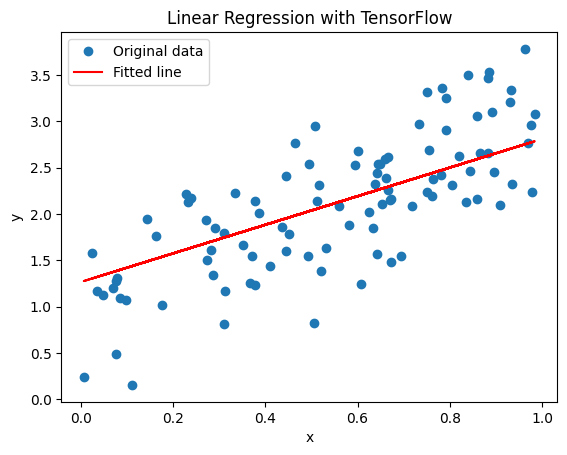

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

num_samples = 100
true_weight = 2.0
true_bias = 1.0
noise_scale = 0.5

# Create input data 'x'
x = np.random.rand(num_samples).astype(np.float32)
# Create output data 'y' with a linear relationship and noise
y = true_weight * x + true_bias + np.random.normal(scale=noise_scale, size=num_samples).astype(np.float32)


# Define the model using Keras
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])

# Define the loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Train the model
epochs = 100
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Make predictions
        predictions = model(x)
        # Calculate the loss
        loss = loss_fn(y, predictions)
    # Calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    # Update the model's parameters
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.numpy():.4f}')

# Get the learned weight and bias
learned_weight = model.get_weights()[0][0][0]
learned_bias = model.get_weights()[1][0]
print(f'Learned weight: {learned_weight:.2f}, Learned bias: {learned_bias:.2f}')

predicted_y = model(x)

# Plot the results
plt.plot(x, y, 'o', label='Original data')
plt.plot(x, predicted_y, '-', label='Fitted line', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with TensorFlow')
plt.legend()
plt.show()

